# Image Masker
---

In [6]:
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
%matplotlib inline

def get_image_id(image_filepath):
    image_name   = image_filepath.split('/')[-1]
    image_id_str = image_name[:-4]
    return image_id_str

def get_annotation(image_id, annotated_image_filepaths):
    # Return annotation image associated with image_id
    ann_ix = [get_image_id(fp) for fp in annotated_image_filepaths].index(image_id)
    return imread(annotated_image_filepaths[ann_ix])

# Convert annotated images to binary masks
def annotations_to_masks(annotated_image_filepaths):
    # annotated_image_filepaths is a list
    for fp in annotated_image_filepaths:
        ann_image     = imread(fp)
        filt          = np.zeros(ann_image.shape)
        if (len(filt.shape) == 3):
            filt[:, :, 0] = 255
            mask          = np.prod(ann_image == filt, axis = 2).astype(int)*255
            imsave(fp, mask)
        else:
            mask = np.zeros(ann_image.shape)
            imsave(fp, mask)
    print('Masked images successfully written.')

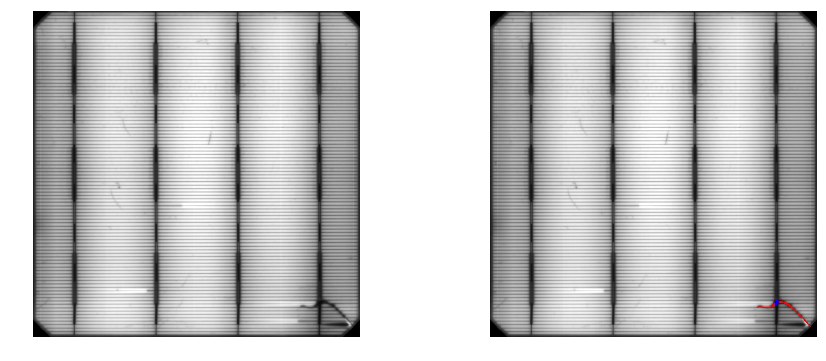

In [8]:
mask_filepaths  = glob('../data/masked-images/*.png')
image_filepaths = glob('../data/resized-images/*.png')

img_ix   = 21
image_id = get_image_id(image_filepaths[img_ix])

f, axs = plt.subplots(1, 2, figsize = (15, 6))
axs[0].imshow(imread(image_filepaths[img_ix]), cmap = 'gray'); axs[0].axis('off');
axs[1].imshow(get_annotation(image_id, mask_filepaths), cmap = 'gray'); axs[1].axis('off');

In [11]:
annotations_to_masks(mask_filepaths)

Masked images successfully written.


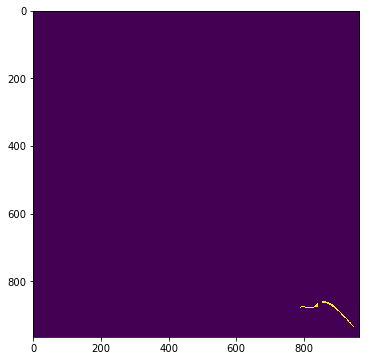

In [14]:
plt.figure(figsize = (15, 6))
plt.imshow(imread(mask_filepaths[21]));